In [1]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [2]:
yogesh=os.listdir("C:/Users/GANESH/Desktop/Pics/Dwayne/")
ashok=os.listdir("C:/Users/GANESH/Desktop/Pics/Scarlet/")
scarlet=os.listdir("C:/Users/GANESH/Desktop/Pics/Tom/")

In [3]:
limit=10
yogesh_images = [None]*limit
ashok_images = [None]*limit
scarlet_images = [None]*limit
j=0
for i in yogesh:
    if (j<limit):
        yogesh_images[j]= imread("C:/Users/GANESH/Desktop/Pics/Dwayne/"+i)
        j+=1
    else:
        break

j=0
for i in ashok:
    if(j<limit):
        ashok_images[j]=imread("C:/Users/GANESH/Desktop/Pics/Scarlet/"+i)
        j+=1
    else:
        break

j=0
for i in scarlet:
    if(j<limit):
        scarlet_images[j]=imread("C:/Users/GANESH/Desktop/Pics/Tom/"+i)
        j+=1
    else:
        break

In [4]:
yogesh_gray=[None]*limit
ashok_gray=[None]*limit
scarlet_gray=[None]*limit
j=0

for i in yogesh:
    if(j<limit):
        yogesh_gray[j]=rgb2gray(yogesh_images[j])
        j+=1
    else:
        break
j=0
for i in ashok:
    if(j<limit):
        ashok_gray[j]=rgb2gray(ashok_images[j])
        j+=1
    else:
        break
    

j=0
for i in scarlet:
    if(j<limit):
        scarlet_gray[j]=rgb2gray(scarlet_images[j])
        j+=1
    else:
        break

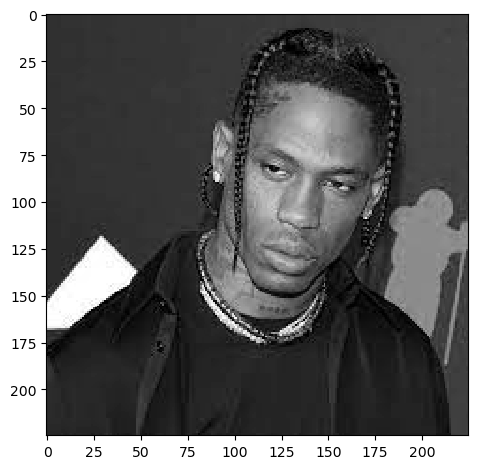

In [5]:
imshow(scarlet_gray[0])

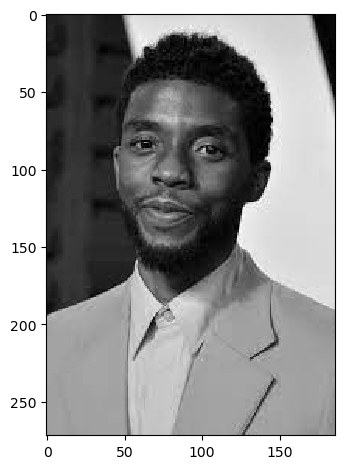

In [6]:
imshow(yogesh_gray[0])

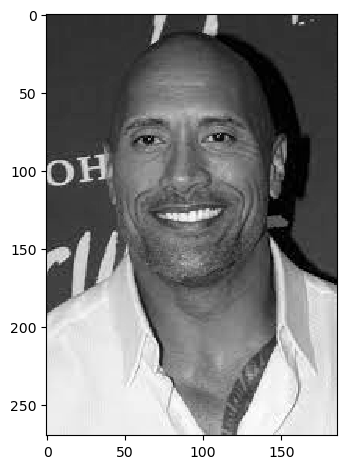

In [7]:
imshow(ashok_gray[0])

In [8]:
scarlet_gray[2].shape

(225, 225)

In [9]:
for j in range(10):
    scarlet_temp=scarlet_gray[j]
    scarlet_gray[j]=resize(scarlet_temp,(512,512))

In [10]:
for j in range(10):
    yogesh_temp=yogesh_gray[j]
    yogesh_gray[j]=resize(yogesh_temp,(512,512))
for j in range(10):
    ashok_temp=ashok_gray[j]
    ashok_gray[j]=resize(ashok_temp,(512,512))



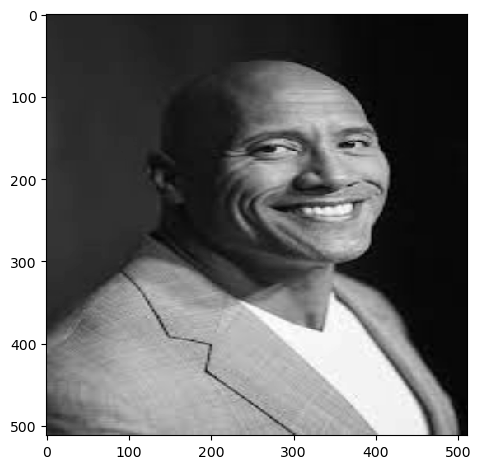

In [11]:
imshow(ashok_gray[2])

In [12]:
len_of_scarlet=len(scarlet_gray)
len_of_ashok=len(ashok_gray)
len_of_yogesh=len(yogesh_gray)


In [13]:
image_size_scarlet=scarlet_gray[1].shape
image_size_yogesh=yogesh_gray[1].shape
image_size_ashok=ashok_gray[1].shape

In [14]:
image_size_scarlet

(512, 512)

In [15]:
flatten_size_scarlet=image_size_scarlet[0]*image_size_scarlet[1]
flatten_size_yogesh=image_size_yogesh[0]*image_size_yogesh[1]
flatten_size_ashok=image_size_ashok[0]*image_size_ashok[1]

In [16]:
flatten_size_scarlet

262144

In [17]:
for i in range(len_of_scarlet):
    scarlet_gray[i]= np.ndarray.flatten(scarlet_gray[i].reshape(flatten_size_scarlet,1))
for i in range(len_of_yogesh):
    yogesh_gray[i]= np.ndarray.flatten(yogesh_gray[i].reshape(flatten_size_yogesh,1))
for i in range(len_of_ashok):
    ashok_gray[i]= np.ndarray.flatten(ashok_gray[i].reshape(flatten_size_ashok,1))

In [18]:
scarlet_gray=np.dstack(scarlet_gray)
yogesh_gray=np.dstack(yogesh_gray)
ashok_gray=np.dstack(ashok_gray)

In [19]:
ashok_gray.shape

(1, 262144, 10)

In [20]:
scarlet_gray=np.rollaxis(scarlet_gray,axis=2,start=0)
yogesh_gray=np.rollaxis(yogesh_gray,axis=2,start=0)
ashok_gray=np.rollaxis(ashok_gray,axis=2,start=0)
ashok_gray.shape



(10, 1, 262144)

In [21]:
yogesh_gray=np.rollaxis(yogesh_gray,axis=2,start=1)
scarlet_gray=np.rollaxis(scarlet_gray,axis=2,start=1)
ashok_gray=np.rollaxis(ashok_gray,axis=2,start=1)

In [22]:
ashok_gray.shape

(10, 262144, 1)

In [23]:
scarlet_gray=scarlet_gray.reshape(len_of_scarlet,flatten_size_scarlet)
yogesh_gray=yogesh_gray.reshape(len_of_yogesh,flatten_size_yogesh)
ashok_gray=ashok_gray.reshape(len_of_ashok,flatten_size_ashok)

In [24]:
yogesh_gray.shape

(10, 262144)

In [25]:
scarlet_data=pd.DataFrame(scarlet_gray)
ashok_data=pd.DataFrame(ashok_gray)
yogesh_data=pd.DataFrame(yogesh_gray)


In [26]:
yogesh_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.130282,0.130282,0.130282,0.130282,0.130622,0.131538,0.132455,0.132805,0.132805,0.132805,...,0.577260,0.576926,0.576592,0.573794,0.567005,0.560215,0.557697,0.557697,0.557697,0.557697
1,0.894634,0.894628,0.894356,0.894989,0.896408,0.897393,0.898036,0.898561,0.899002,0.899259,...,0.461303,0.489909,0.549136,0.588810,0.601361,0.601348,0.585478,0.570531,0.556644,0.556323
2,0.730808,0.732677,0.729689,0.726702,0.722876,0.718396,0.713915,0.709434,0.704954,0.702088,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.793197,0.791236,0.798099,0.804349,0.802633,0.800917,0.790143,0.776899,0.766236,0.758156,...,0.120279,0.120244,0.121827,0.125027,0.125710,0.117162,0.108613,0.121253,0.135522,0.131445
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.012114,0.012114,0.012114,0.012394,0.015250,0.018106,0.019652,0.019652,0.019652,0.019652
5,0.642418,0.639426,0.621973,0.605564,0.589490,0.597405,0.609181,0.639103,0.667601,0.692276,...,0.054512,0.042340,0.042625,0.047551,0.055922,0.063281,0.052499,0.051345,0.080205,0.085152
6,0.292666,0.292666,0.292666,0.292666,0.292666,0.292666,0.292414,0.290866,0.289319,0.288745,...,0.925488,0.924350,0.926522,0.928695,0.928491,0.927823,0.927357,0.927357,0.927357,0.927357
7,0.879303,0.879045,0.879369,0.879693,0.880246,0.881323,0.882401,0.882933,0.882933,0.882933,...,0.716255,0.716255,0.716255,0.715562,0.714160,0.712759,0.711357,0.709956,0.708554,0.709672
8,0.110972,0.110972,0.110972,0.110972,0.110972,0.110972,0.110972,0.110805,0.110519,0.110406,...,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902
9,0.892126,0.892647,0.896419,0.888531,0.875818,0.844140,0.808996,0.769615,0.733899,0.725108,...,0.228760,0.228083,0.226745,0.225322,0.224263,0.223367,0.223367,0.223367,0.223367,0.223367


In [27]:
scarlet_data["label"]="Travis"
yogesh_data["label"]="Chad"
ashok_data["label"]="Kyliye"


In [28]:
ashok_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,...,0.905430,0.915403,0.920352,0.917167,0.913981,0.912799,0.912799,0.912799,0.912799,Kyliye
1,0.379864,0.379864,0.379864,0.379864,0.379864,0.379864,0.379864,0.379864,0.379864,0.379864,...,0.442609,0.442195,0.439897,0.438687,0.438687,0.438687,0.438687,0.438687,0.438687,Kyliye
2,0.156950,0.157209,0.156885,0.156560,0.156334,0.156334,0.156334,0.155790,0.154712,0.153635,...,0.061879,0.028240,0.014602,0.021408,0.028214,0.031255,0.032657,0.034058,0.032940,Kyliye
3,0.181301,0.201557,0.172401,0.143245,0.126346,0.123957,0.121569,0.129336,0.140255,0.150057,...,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,Kyliye
4,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,...,0.165726,0.185345,0.202267,0.194341,0.186416,0.182126,0.182126,0.182126,0.182126,Kyliye
5,0.597959,0.668574,0.558095,0.447615,0.459708,0.575696,0.691684,0.522124,0.321561,0.161224,...,0.114584,0.126471,0.141715,0.187873,0.234031,0.259013,0.259013,0.259013,0.259013,Kyliye
6,0.177518,0.177183,0.162720,0.148339,0.134027,0.125874,0.122603,0.123536,0.127499,0.132241,...,0.278729,0.278729,0.278434,0.277730,0.277337,0.277337,0.277337,0.277337,0.277337,Kyliye
7,0.035102,0.035102,0.035102,0.035102,0.035102,0.035674,0.036350,0.037768,0.039023,0.039023,...,0.063691,0.063691,0.063619,0.059167,0.055404,0.055404,0.055404,0.055404,0.055404,Kyliye
8,0.268458,0.266458,0.269872,0.273285,0.278347,0.284413,0.290466,0.296151,0.301837,0.306501,...,0.049843,0.051360,0.052876,0.057319,0.061868,0.065269,0.066786,0.068302,0.067414,Kyliye
9,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,...,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,Kyliye


In [29]:
img_1=pd.concat([scarlet_data,yogesh_data])

In [30]:
img=pd.concat([img_1,ashok_data])

In [31]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.192707,0.192707,0.192707,0.192707,0.192707,0.192707,0.191309,0.189585,0.188785,0.188785,...,0.249767,0.250207,0.249724,0.249332,0.249332,0.249332,0.251788,0.254478,0.253737,Travis
1,0.288536,0.288536,0.288536,0.286377,0.284615,0.284615,0.284615,0.284615,0.282731,0.280693,...,0.229981,0.229567,0.227269,0.226059,0.226059,0.226059,0.226059,0.226059,0.226059,Travis
2,0.151549,0.151549,0.151549,0.151699,0.153422,0.155145,0.155471,0.155471,0.155730,0.156213,...,0.163435,0.163870,0.161390,0.158441,0.153479,0.148518,0.146640,0.145055,0.145492,Travis
3,0.507722,0.505786,0.499314,0.491334,0.481600,0.466788,0.452309,0.438107,0.427147,0.416788,...,0.080427,0.086275,0.086275,0.086627,0.087403,0.088746,0.090236,0.091013,0.091245,Travis
4,0.550235,0.550235,0.550235,0.550235,0.550235,0.550235,0.550235,0.550235,0.550235,0.550235,...,0.255965,0.256792,0.261387,0.263808,0.263808,0.263808,0.263808,0.263808,0.263808,Travis
5,0.575079,0.575079,0.575079,0.575079,0.575079,0.575079,0.575079,0.575079,0.575079,0.575079,...,0.710384,0.710384,0.710384,0.710384,0.710384,0.710384,0.710384,0.710384,0.710384,Travis
6,0.114849,0.114849,0.114849,0.114998,0.116721,0.118445,0.118770,0.118770,0.118770,0.118770,...,0.205992,0.217363,0.219987,0.223560,0.231211,0.238861,0.232421,0.224643,0.226786,Travis
7,0.984314,0.984314,0.984314,0.984314,0.984314,0.984901,0.985588,0.987021,0.988235,0.988235,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Travis
8,0.290241,0.290241,0.290241,0.290241,0.290241,0.290241,0.290241,0.290241,0.290241,0.290241,...,0.228256,0.241231,0.244739,0.246677,0.232645,0.218613,0.209074,0.200304,0.202372,Travis
9,0.962160,0.962160,0.962160,0.962204,0.962704,0.963205,0.964002,0.964869,0.965271,0.965271,...,0.555295,0.505747,0.484453,0.467657,0.470171,0.472686,0.467484,0.461550,0.463185,Travis


In [32]:
from sklearn.utils import shuffle

In [33]:
img_shuffle = shuffle(img).reset_index()

In [34]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0,0.130282,0.130282,0.130282,0.130282,0.130622,0.131538,0.132455,0.132805,0.132805,...,0.576926,0.576592,0.573794,0.567005,0.560215,0.557697,0.557697,0.557697,0.557697,Chad
1,6,0.177518,0.177183,0.162720,0.148339,0.134027,0.125874,0.122603,0.123536,0.127499,...,0.278729,0.278729,0.278434,0.277730,0.277337,0.277337,0.277337,0.277337,0.277337,Kyliye
2,9,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,...,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,Kyliye
3,0,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,...,0.905430,0.915403,0.920352,0.917167,0.913981,0.912799,0.912799,0.912799,0.912799,Kyliye
4,3,0.181301,0.201557,0.172401,0.143245,0.126346,0.123957,0.121569,0.129336,0.140255,...,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,Kyliye
5,4,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,...,0.165726,0.185345,0.202267,0.194341,0.186416,0.182126,0.182126,0.182126,0.182126,Kyliye
6,1,0.288536,0.288536,0.288536,0.286377,0.284615,0.284615,0.284615,0.284615,0.282731,...,0.229981,0.229567,0.227269,0.226059,0.226059,0.226059,0.226059,0.226059,0.226059,Travis
7,2,0.156950,0.157209,0.156885,0.156560,0.156334,0.156334,0.156334,0.155790,0.154712,...,0.061879,0.028240,0.014602,0.021408,0.028214,0.031255,0.032657,0.034058,0.032940,Kyliye
8,7,0.984314,0.984314,0.984314,0.984314,0.984314,0.984901,0.985588,0.987021,0.988235,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Travis
9,7,0.035102,0.035102,0.035102,0.035102,0.035102,0.035674,0.036350,0.037768,0.039023,...,0.063691,0.063691,0.063619,0.059167,0.055404,0.055404,0.055404,0.055404,0.055404,Kyliye


In [35]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [36]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.130282,0.130282,0.130282,0.130282,0.130622,0.131538,0.132455,0.132805,0.132805,0.132805,...,0.576926,0.576592,0.573794,0.567005,0.560215,0.557697,0.557697,0.557697,0.557697,Chad
1,0.177518,0.177183,0.162720,0.148339,0.134027,0.125874,0.122603,0.123536,0.127499,0.132241,...,0.278729,0.278729,0.278434,0.277730,0.277337,0.277337,0.277337,0.277337,0.277337,Kyliye
2,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,0.225256,...,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,0.238687,Kyliye
3,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,0.189351,...,0.905430,0.915403,0.920352,0.917167,0.913981,0.912799,0.912799,0.912799,0.912799,Kyliye
4,0.181301,0.201557,0.172401,0.143245,0.126346,0.123957,0.121569,0.129336,0.140255,0.150057,...,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,0.051561,Kyliye
5,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,0.642029,...,0.165726,0.185345,0.202267,0.194341,0.186416,0.182126,0.182126,0.182126,0.182126,Kyliye
6,0.288536,0.288536,0.288536,0.286377,0.284615,0.284615,0.284615,0.284615,0.282731,0.280693,...,0.229981,0.229567,0.227269,0.226059,0.226059,0.226059,0.226059,0.226059,0.226059,Travis
7,0.156950,0.157209,0.156885,0.156560,0.156334,0.156334,0.156334,0.155790,0.154712,0.153635,...,0.061879,0.028240,0.014602,0.021408,0.028214,0.031255,0.032657,0.034058,0.032940,Kyliye
8,0.984314,0.984314,0.984314,0.984314,0.984314,0.984901,0.985588,0.987021,0.988235,0.988235,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Travis
9,0.035102,0.035102,0.035102,0.035102,0.035102,0.035674,0.036350,0.037768,0.039023,0.039023,...,0.063691,0.063691,0.063619,0.059167,0.055404,0.055404,0.055404,0.055404,0.055404,Kyliye


In [37]:
img_shuffle.shape

(30, 262145)

In [38]:
x = img_shuffle.values[:,:-1]

In [39]:
y= img_shuffle.values[:,-1]

In [40]:
x

array([[0.13028196078431373, 0.13028196078431373, 0.13028196078431373,
        ..., 0.557696862745098, 0.557696862745098, 0.557696862745098],
       [0.17751787683823533, 0.17718284007352944, 0.1627204197303922,
        ..., 0.2773372549019608, 0.2773372549019608, 0.2773372549019608],
       [0.22525568627450981, 0.22525568627450981, 0.22525568627450981,
        ..., 0.2386870588235294, 0.23868705882352942,
        0.23868705882352942],
       ...,
       [0.8946338885595285, 0.8946275997932286, 0.8943561347146128, ...,
        0.5705307414215686, 0.556644405637255, 0.5563227144607844],
       [0.19270666666666666, 0.19270666666666666, 0.19270666666666666,
        ..., 0.25178825660855164, 0.25447761818081727,
        0.25373654965868186],
       [0.5750788235294118, 0.5750788235294118, 0.5750788235294118, ...,
        0.7103843137254902, 0.7103843137254902, 0.7103843137254903]],
      dtype=object)

In [41]:
y

array(['Chad', 'Kyliye', 'Kyliye', 'Kyliye', 'Kyliye', 'Kyliye', 'Travis',
       'Kyliye', 'Travis', 'Kyliye', 'Travis', 'Travis', 'Travis',
       'Travis', 'Travis', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad',
       'Kyliye', 'Chad', 'Travis', 'Chad', 'Kyliye', 'Chad', 'Kyliye',
       'Chad', 'Travis', 'Travis'], dtype=object)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [43]:
from sklearn import svm

In [44]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [45]:
y_pred=clf.predict(x_test)

In [46]:
y_pred

array(['Kyliye', 'Kyliye', 'Travis', 'Travis', 'Kyliye', 'Kyliye', 'Chad',
       'Chad'], dtype=object)

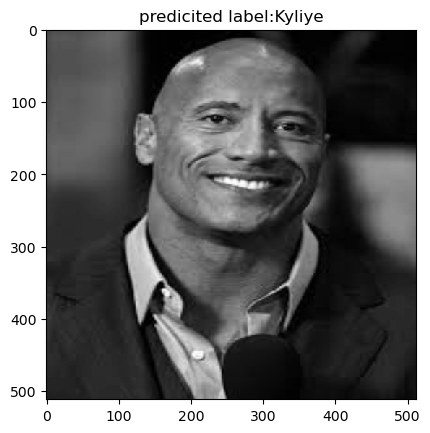

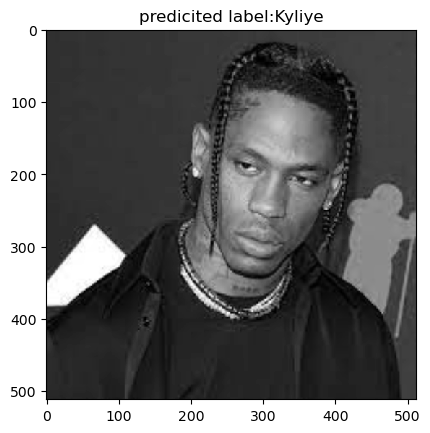

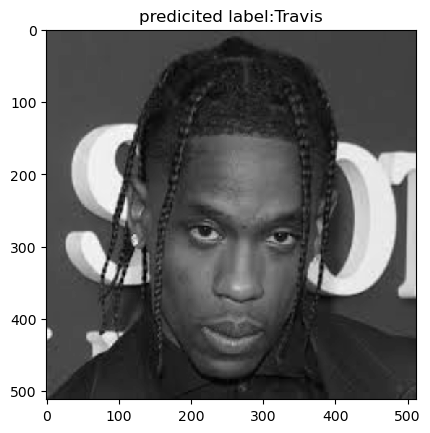

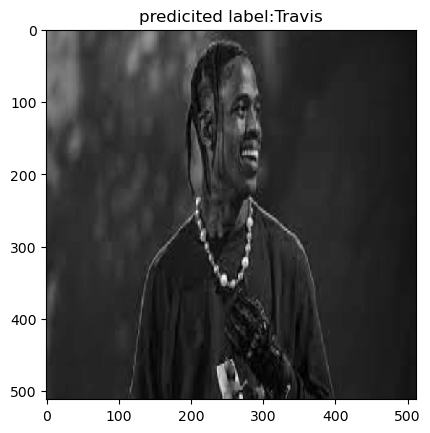

In [47]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [48]:
from sklearn import metrics

In [49]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [50]:
accuracy

0.75

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0],
       [0, 3, 0],
       [1, 1, 2]], dtype=int64)